# Prediction of Yield

In [37]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import warnings

plt.tight_layout()
# supress the annoying sns future deprecation warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

<Figure size 640x480 with 0 Axes>

In [47]:
### IGNORE BUT KEEP: this code cleans and converts "./temp/apy.csv" to the needed state-specific dataset ###

# initial_df = pd.read_csv("./temp/apy.csv")

# # getting rid of the null values
# initial_df = initial_df.dropna()

# # export to new CSV
# initial_df.to_csv("./data/crop.yield.prediction.2.csv", index=False)

In [48]:
df = pd.read_csv("./data/crop.yield.prediction.2.csv")
df["Yield"] = df["Yield"].div(df["Area"])
df = df.drop(columns=["Crop_Year", "Area"])
df

,Crop,Season,State,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,Whole Year,Assam,56708,2051.4,7024878.38,22882.34,1.078504e-05
1,Arhar/Tur,Kharif,Assam,4685,2051.4,631643.29,2057.47,1.070416e-04
2,Castor seed,Kharif,Assam,22,2051.4,75755.32,246.76,2.994137e-04
3,Coconut,Whole Year,Assam,126905000,2051.4,1870661.52,6093.36,2.664861e-01
4,Cotton(lint),Kharif,Assam,794,2051.4,165500.63,539.09,2.420409e-04
...,...,...,...,...,...,...,...,...
19684,Small millets,Kharif,Nagaland,2000,1498.0,395200.00,1160.00,1.250000e-04
19685,Wheat,Rabi,Nagaland,3000,1498.0,98800.00,290.00,3.000000e-03
19686,Maize,Kharif,Jammu and Kashmir,440900,1356.2,29586735.11,96373.73,4.133388e-06
19687,Rice,Kharif,Jammu and Kashmir,5488,1356.2,26242746.82,85481.26,6.044210e-08


In [49]:
unique_crops = list(np.unique(df["Crop"]))
unique_seasons = list(np.unique(df["Season"]))
unique_states = list(np.unique(df["State"]))

/home/smv/Code/fresh-fields/ml-official/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


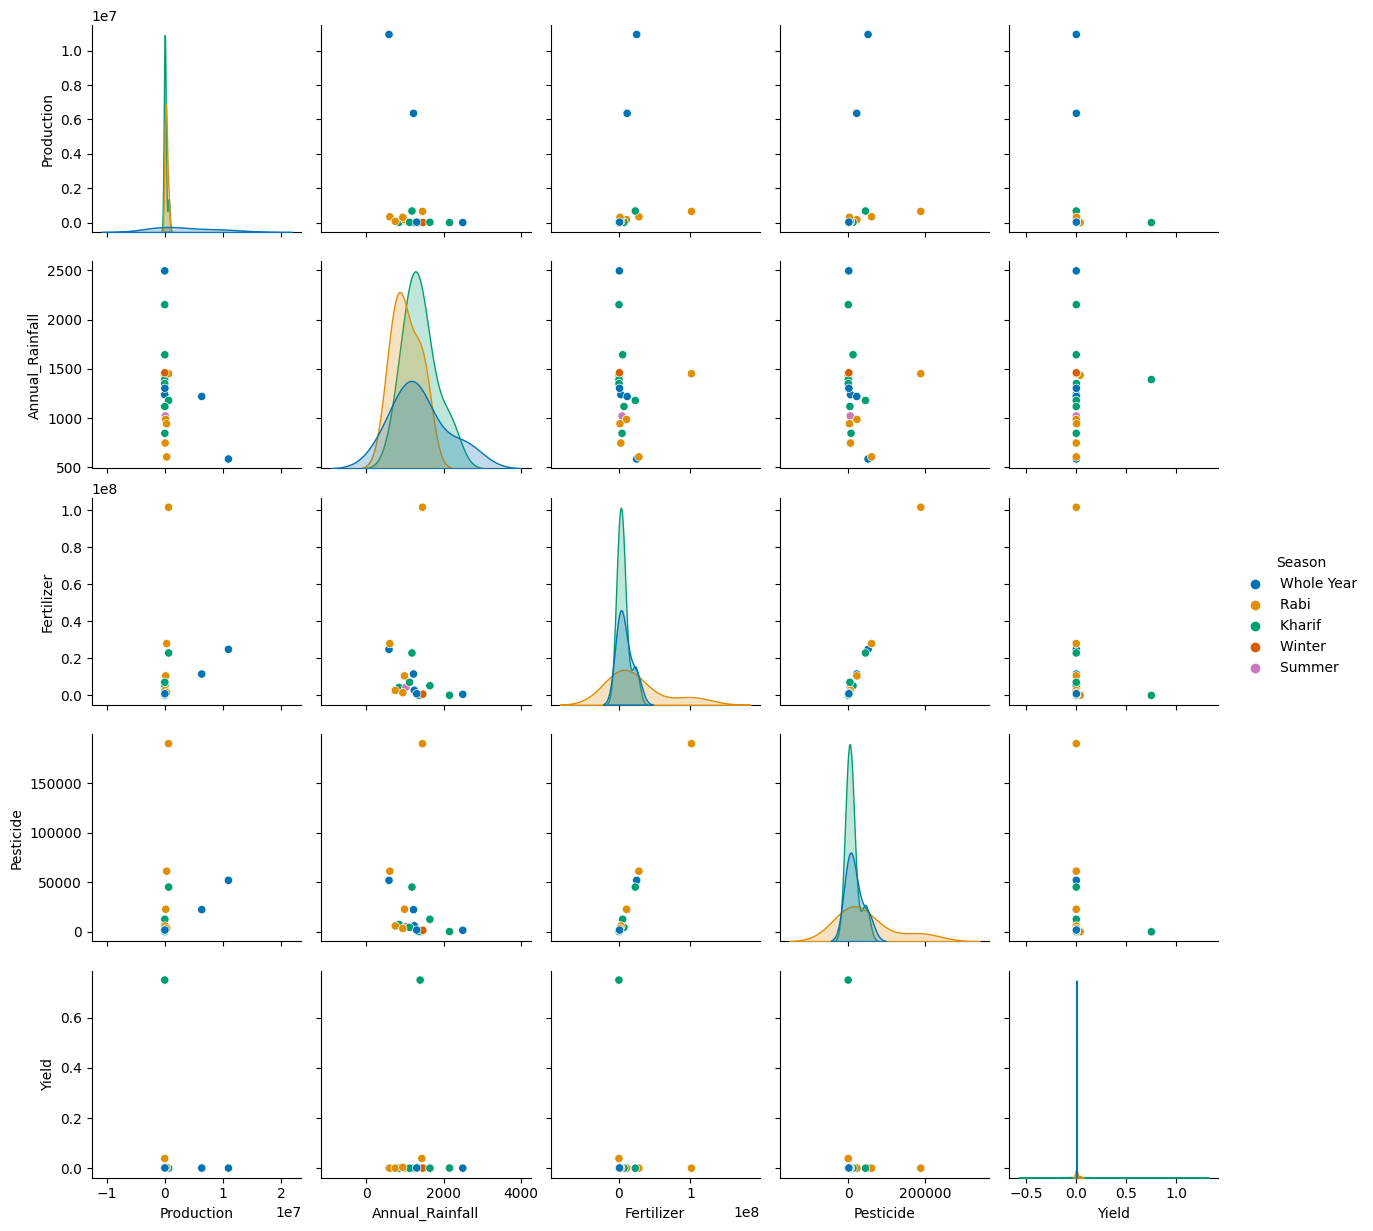

In [50]:
sns.pairplot(df.sample(n=20), hue="Season", palette="colorblind")

In [51]:
df["Crop"] = df["Crop"].map(lambda x: unique_crops.index(x))
df["Season"] = df["Season"].map(lambda x: unique_seasons.index(x))
df["State"] = df["State"].map(lambda x: unique_states.index(x))

In [52]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Crop,19689.0,2.935766e+01,1.556086e+01,0.00,17.000000,3.100000e+01,4.300000e+01,5.400000e+01
Season,19689.0,2.037381e+00,1.222513e+00,0.00,1.000000,2.000000e+00,3.000000e+00,5.000000e+00
State,19689.0,1.432881e+01,9.000461e+00,0.00,7.000000,1.400000e+01,2.200000e+01,2.900000e+01
Production,19689.0,1.643594e+07,2.630568e+08,0.00,1393.000000,1.380400e+04,1.227180e+05,6.326000e+09
Annual_Rainfall,19689.0,1.437755e+03,8.169096e+02,301.30,940.700000,1.247600e+03,1.643700e+03,6.552700e+03
Fertilizer,19689.0,2.410331e+07,9.494600e+07,54.17,188014.620000,1.234957e+06,1.000385e+07,4.835407e+09
Pesticide,19689.0,4.884835e+04,2.132874e+05,0.09,356.700000,2.421900e+03,2.004170e+04,1.575051e+07
Yield,19689.0,6.788409e-02,9.656749e-01,0.00,0.000015,1.425339e-04,1.224818e-03,4.807517e+01


In [53]:
from sklearn.model_selection import train_test_split

X = df.loc[:, df.columns[0:-1]].to_numpy()
y = df["Yield"].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model: RandomForestRegressor
  MAE:      0.043198301076378356
  RMSE:     0.7939606853189138
  accuracy: 0.573751699978343
model: SVR
  MAE:      0.14441652767735177
  RMSE:     1.1061907308059358
  accuracy: -0.5561684746142663
model: Ridge
  MAE:      0.13224604738425283
  RMSE:     1.1052056812503583
  accuracy: -0.5955663574607568


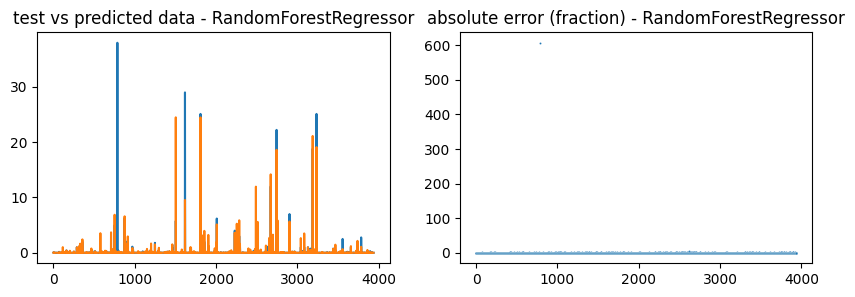

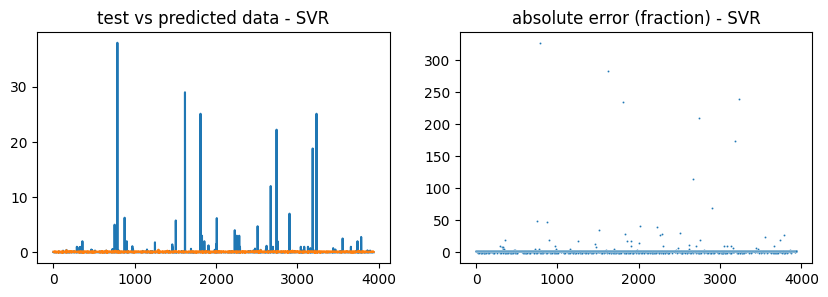

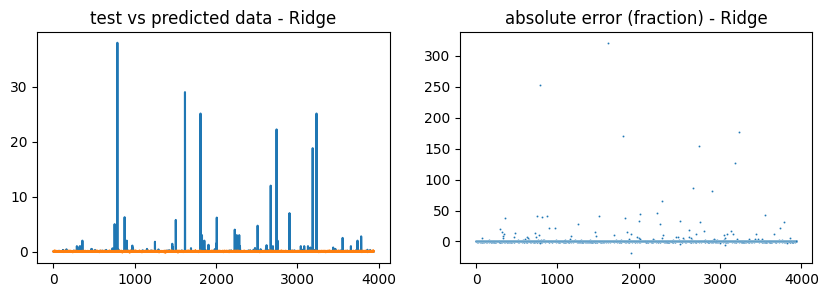

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge


def regression_result(model):
    name = model.__class__.__name__

    pipe = make_pipeline(StandardScaler(), model)

    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    print(f"model: {name}")
    print(f"  MAE:      {mean_absolute_error(y_test, y_pred)}")
    print(f"  RMSE:     {mean_squared_error(y_test, y_pred, squared=False)}")
    print(f"  accuracy: {1 - np.average(abs((y_test - y_pred) / y_pred))}")

    fig, ax = plt.subplots(ncols=2, figsize=(10, 3))
    ax[0].set_title(f"test vs predicted data - {name}")
    sns.lineplot(y_test, ax=ax[0])
    sns.lineplot(y_pred, ax=ax[0])

    ax[1].set_title(f"absolute error (fraction) - {name}")
    sns.scatterplot(abs(y_pred - y_test) / y_pred, ax=ax[1], s=2)


### ------ ###

forest = RandomForestRegressor(random_state=42, n_estimators=20)
svm = SVR()
ridge = Ridge(alpha=0.5)

regressors = [forest, svm, ridge]

for model in regressors:
    regression_result(model)